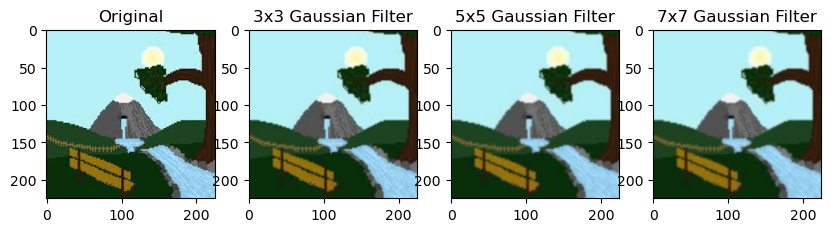

In [18]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image

# Replace 'your_image_path' with the path to your own image
your_image_path = 'D:/4.3/new sir/download.jpg'
your_image = Image.open(your_image_path)

# Convert the PIL Image to a NumPy array
your_image_array = np.array(your_image)

def apply_gaussian_filter(image, kernel_size):
    # Generate a 2D Gaussian kernel
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*1.0))*np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2)/(2.0*1.0)),
        (kernel_size, kernel_size)
    )

    # Normalize the kernel
    kernel /= np.sum(kernel)

    # Apply the filter to each channel of the image
    result = np.zeros_like(image)
    for i in range(image.shape[2]):  # Loop over RGB channels
        result[:, :, i] = scipy.ndimage.convolve(image[:, :, i], kernel, mode='nearest')

    return result

# Apply 3x3 Gaussian filter
result_3x3 = apply_gaussian_filter(your_image_array, 3)

# Apply 5x5 Gaussian filter
result_5x5 = apply_gaussian_filter(your_image_array, 5)

# Apply 7x7 Gaussian filter
result_7x7 = apply_gaussian_filter(your_image_array, 7)

# Display the results (original and filtered images)
plt.figure(figsize=(10, 4))
plt.subplot(141), plt.imshow(your_image_array), plt.title('Original')
plt.subplot(142), plt.imshow(result_3x3), plt.title('3x3 Gaussian Filter')
plt.subplot(143), plt.imshow(result_5x5), plt.title('5x5 Gaussian Filter')
plt.subplot(144), plt.imshow(result_7x7), plt.title('7x7 Gaussian Filter')
plt.show()


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/38.6 MB ? eta -:--:--
                                             0.0/38.6 MB 435.7 kB/s eta 0:01:29
                                             0.0/38.6 MB 435.7 kB/s eta 0:01:29
                                             0.1/38.6 MB 409.6 kB/s eta 0:01:35
                                             0.1/38.6 MB 525.1 kB/s eta 0:01:14
                                             0.1/38.6 MB 467.6 kB/s eta 0:01:23
                                             0.2/38.6 MB 808.4 kB/s eta 0:00:48
                                             0.3/38.6 MB 682.7 kB/s eta 0:00:57
                                             0.4/38.6 MB 916.6 kB/s eta 0:00:42
                                              0.5/38.6 MB 1.1 MB/s eta 0:00:34
                                              0.5/38.6 MB 1.1 MB/s eta 0:00:36
                                              0.6/38

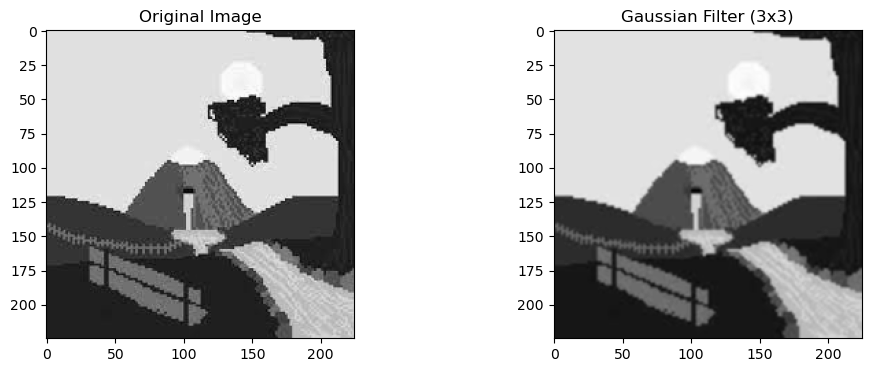

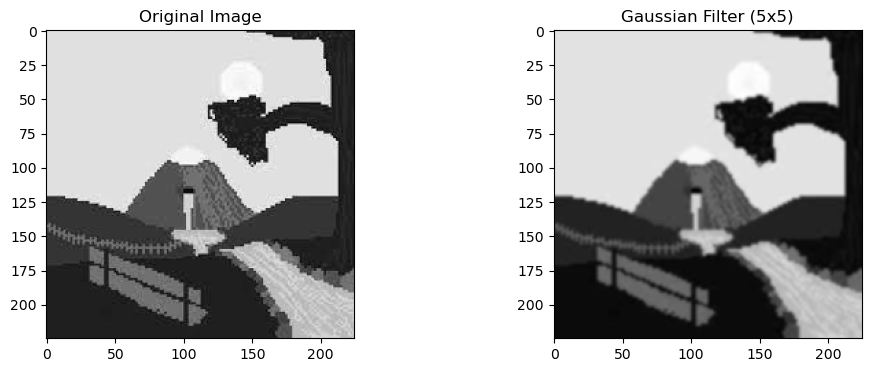

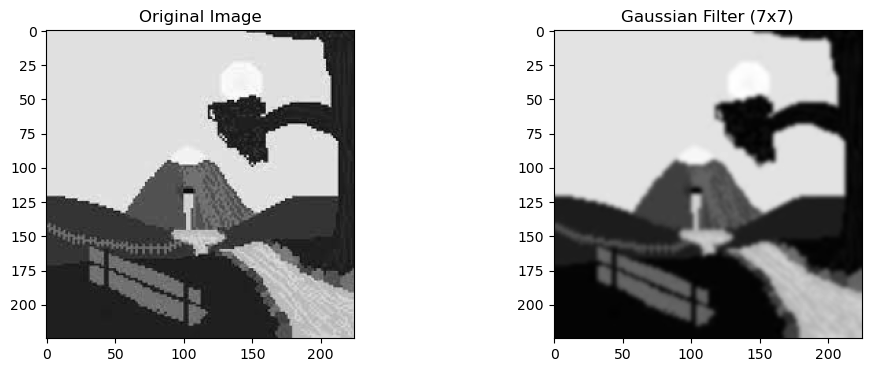

In [2]:
!pip install opencv-python

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('D:/4.3/new sir/download.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian filters of different sizes
kernel_sizes = [3, 5, 7]

for size in kernel_sizes:
    # Create a Gaussian kernel
    kernel = cv2.getGaussianKernel(size, 0)
    # Apply the filter to the image
    filtered_image = cv2.filter2D(gray_image, -1, kernel * kernel.T)

    # Display the original and filtered images
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(filtered_image, cmap='gray'), plt.title(f'Gaussian Filter ({size}x{size})')
    plt.show()

In [13]:
from PIL import Image
import numpy as np

# Replace 'your_image_path' with the path to your own image
your_image_path = 'D:/4.3/new sir/images.jpg'
your_image = Image.open(your_image_path)

# Convert the PIL Image to grayscale
your_image_gray = your_image.convert('L')

# Convert the grayscale PIL Image to a NumPy array
your_image_array = np.array(your_image_gray)

def generate_gaussian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size), dtype=float)
    kernel_radius = kernel_size // 2

    for i in range(-kernel_radius, kernel_radius + 1):
        for j in range(-kernel_radius, kernel_radius + 1):
            kernel[i + kernel_radius, j + kernel_radius] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(i**2 + j**2) / (2 * sigma**2))

    return kernel / np.sum(kernel)

def apply_gaussian_filter(image, kernel_size, sigma):
    height, width = image.shape
    output = np.zeros_like(image, dtype=float)

    kernel = generate_gaussian_kernel(kernel_size, sigma)
    kernel_radius = kernel_size // 2

    for i in range(kernel_radius, height - kernel_radius):
        for j in range(kernel_radius, width - kernel_radius):
            region = image[i - kernel_radius:i + kernel_radius + 1, j - kernel_radius:j + kernel_radius + 1]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)

# Apply 3x3 Gaussian filter
result_3x3 = apply_gaussian_filter(your_image_array, 3, 1.0)

# Apply 5x5 Gaussian filter
result_5x5 = apply_gaussian_filter(your_image_array, 5, 1.0)

# Apply 7x7 Gaussian filter
result_7x7 = apply_gaussian_filter(your_image_array, 7, 1.0)

# Display the results (original and filtered images)
Image.fromarray(result_3x3).show()
Image.fromarray(result_5x5).show()
Image.fromarray(result_7x7).show()


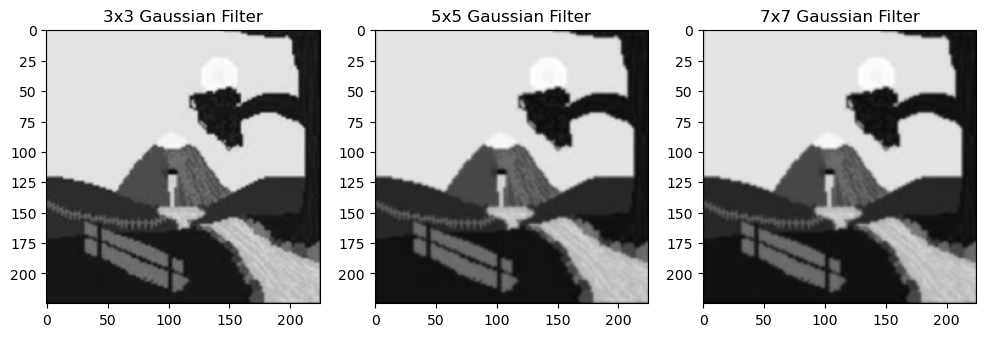

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image_path' with the path to your own image
your_image_path = 'D:/4.3/new sir/download.jpg'
your_image = Image.open(your_image_path)

# Convert the PIL Image to grayscale
your_image_gray = your_image.convert('L')

# Convert the grayscale PIL Image to a NumPy array
your_image_array = np.array(your_image_gray)

def apply_gaussian_filter(image, sigma, window_size):
    kernel = np.fromfunction(lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - (window_size - 1) / 2)**2 / (2 * sigma**2)), (window_size,))
    kernel /= np.sum(kernel)

    result_horizontal = np.zeros_like(image, dtype=float)
    for i in range(image.shape[0]):
        result_horizontal[i, :] = np.convolve(image[i, :], kernel, mode='same')

    result_vertical = np.zeros_like(image, dtype=float)
    for j in range(image.shape[1]):
        result_vertical[:, j] = np.convolve(result_horizontal[:, j], kernel, mode='same')

    return result_vertical.astype(np.uint8)

# Apply Gaussian filter with sigma 1.0 and different window sizes
result_3x3 = apply_gaussian_filter(your_image_array, 1.0, 3)
result_5x5 = apply_gaussian_filter(your_image_array, 1.0, 5)
result_7x7 = apply_gaussian_filter(your_image_array, 1.0, 7)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(result_3x3, cmap='gray'), plt.title('3x3 Gaussian Filter')
plt.subplot(132), plt.imshow(result_5x5, cmap='gray'), plt.title('5x5 Gaussian Filter')
plt.subplot(133), plt.imshow(result_7x7, cmap='gray'), plt.title('7x7 Gaussian Filter')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


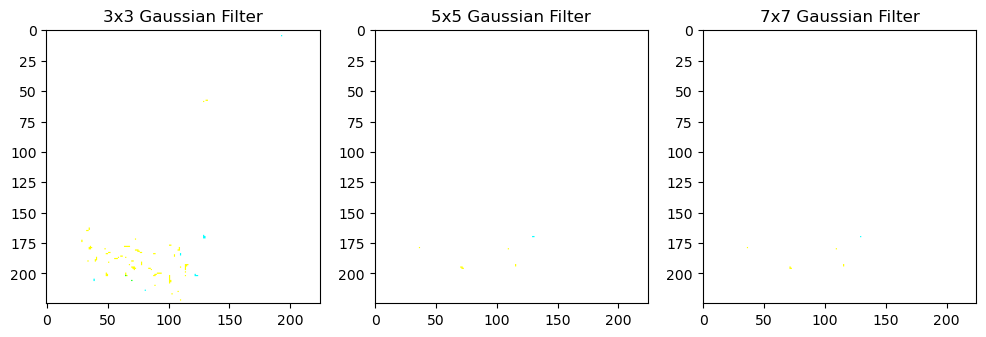

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image_path' with the path to your own image
your_image_path = 'D:/4.3/new sir/download.jpg'
your_image = Image.open(your_image_path)

# Convert the PIL Image to a NumPy array
your_image_array = np.array(your_image)

def apply_gaussian_filter(image, sigma, window_size):
    result = np.zeros_like(image, dtype=float)
    for channel in range(image.shape[2]):
        channel_data = image[:, :, channel]

        kernel = np.fromfunction(lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - (window_size - 1) / 2)**2 / (2 * sigma**2)), (window_size,))
        kernel /= np.sum(kernel)

        result_horizontal = np.zeros_like(channel_data, dtype=float)
        for i in range(channel_data.shape[0]):
            result_horizontal[i, :] = np.convolve(channel_data[i, :], kernel, mode='same')

        result_vertical = np.zeros_like(channel_data, dtype=float)
        for j in range(channel_data.shape[1]):
            result_vertical[:, j] = np.convolve(result_horizontal[:, j], kernel, mode='same')

        result[:, :, channel] = result_vertical.astype(np.uint8)

    return result

# Apply Gaussian filter with sigma 1.0 and different window sizes
result_3x3 = apply_gaussian_filter(your_image_array, 1.0, 3)
result_5x5 = apply_gaussian_filter(your_image_array, 1.0, 5)
result_7x7 = apply_gaussian_filter(your_image_array, 1.0, 7)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(result_3x3), plt.title('3x3 Gaussian Filter')
plt.subplot(132), plt.imshow(result_5x5), plt.title('5x5 Gaussian Filter')
plt.subplot(133), plt.imshow(result_7x7), plt.title('7x7 Gaussian Filter')

plt.show()


In [20]:
from PIL import Image
import numpy as np

# Load the image
image_path = 'D:/4.3/new sir/download.jpg'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
gray_array = np.array(gray_image)

# Apply Gaussian filters of different sizes
kernel_sizes = [3, 5, 7]

for size in kernel_sizes:
    # Create a Gaussian kernel
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*size**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*size**2)),
        (size, size)
    )

    # Normalize the kernel
    kernel /= np.sum(kernel)

    # Apply the filter to the image
    filtered_image = np.zeros_like(gray_array, dtype=np.float32)

    for i in range(size//2, gray_array.shape[0] - size//2):
        for j in range(size//2, gray_array.shape[1] - size//2):
            filtered_image[i, j] = np.sum(gray_array[i-size//2:i+size//2+1, j-size//2:j+size//2+1] * kernel)

    # Display the original and filtered images
    Image.fromarray(gray_array.astype(np.uint8)).show(title='Original Image')
    Image.fromarray(filtered_image.astype(np.uint8)).show(title=f'Gaussian Filter ({size}x{size})')


In [21]:
from PIL import Image
import numpy as np

# Load the image
image_path = 'D:/4.3/new sir/download.jpg'
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Apply Gaussian filters of different sizes to each channel
kernel_sizes = [3, 5, 7]

for size in kernel_sizes:
    # Create a Gaussian kernel
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*size**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*size**2)),
        (size, size)
    )

    # Normalize the kernel
    kernel /= np.sum(kernel)

    # Apply the filter to each channel
    filtered_image = np.zeros_like(image_array, dtype=np.float32)

    for channel in range(3):  # Loop over RGB channels
        for i in range(size//2, image_array.shape[0] - size//2):
            for j in range(size//2, image_array.shape[1] - size//2):
                filtered_image[i, j, channel] = np.sum(
                    image_array[i-size//2:i+size//2+1, j-size//2:j+size//2+1, channel] * kernel
                )

    # Display the original and filtered images
    Image.fromarray(image_array.astype(np.uint8)).show(title='Original Image')
    Image.fromarray(filtered_image.astype(np.uint8)).show(title=f'Gaussian Filter ({size}x{size})')
